In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print("Notebook is working")

Notebook is working


**Data source:** https://www.kaggle.com/datasets/bytadit/ecommerce-order-dataset/data

# **1. Introduction**
I have 2 purposes for this project. To further practice data analysis with python and to do analysis on an ecommerce and supply chain dataset. 

The purpose of this project is to epxlore an ecommerce and supply chain dataset and find areas to analyze. Below is a list of the sections in this notebook:

1. Data inspection
2. Finding areas of inspection
3. Data processing and analysis
4. Conclusion

---

# **2. Data Inspection**
Before doing anything else, let's check the datasets that we have in the `data` directory.

In [30]:
# Current working directory
os.listdir("data")
os.getcwd()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

Our dataset seems to be intended for machine learning as it is split into training and test data. For this specific project we'll focus mainly on EDA, wo we will not be modifying the data in any way. Thus it is safe to combine them both.

## 2.1. Concatenating datasets
First, let's read the training data into python.

In [ ]:
# Get into 'train' working directory
os.chdir("d:\\2. Areas\\Career_Exploration\\Data_Analyst\\ecommerce_sc_dataset\\data\\train")
os.listdir(".")

# Reading the files into python
df_tr_cust = pd.read_csv("train_Customers.csv")
df_tr_ordItems = pd.read_csv("train_OrderItems.csv")
df_tr_orders = pd.read_csv("train_Orders.csv")
df_tr_payments = pd.read_csv("train_Payments.csv")
df_tr_products = pd.read_csv("train_Products.csv")

Now the testing data

In [ ]:
# Get into 'test' working directory
os.chdir("d:\\2. Areas\\Career_Exploration\\Data_Analyst\\ecommerce_sc_dataset\\data\\test")
os.listdir(".")

# Reading the files into python
df_ts_cust = pd.read_csv("test_customers.csv")
df_ts_ordItems = pd.read_csv("test_OrderItems.csv")
df_ts_orders = pd.read_csv("test_Orders.csv")
df_ts_payments = pd.read_csv("test_Payments.csv")
df_ts_products = pd.read_csv("test_Products.csv")

Now that we have the data in python, we will now create copies and work with them instead of the raw data.

In [ ]:
# Create copies
df_cust = pd.concat([df_ts_cust.copy(),df_tr_cust.copy()], ignore_index=True)
df_ordItems = pd.concat([df_ts_ordItems.copy(),df_tr_ordItems.copy()], ignore_index=True)
df_orders = pd.concat([df_ts_orders.copy(),df_tr_orders.copy()], ignore_index=True)
df_payments = pd.concat([df_ts_payments.copy(),df_tr_payments.copy()], ignore_index=True)
df_products = pd.concat([df_ts_products.copy(),df_tr_products.copy()], ignore_index=True)

The code below will export the combined databases/

In [ ]:
# Export data for temp checkings
df_cust.to_csv("comb_cust.csv")
df_ordItems.to_csv("comb_ordItems.csv")
df_orders.to_csv("comb_orders.csv")
df_payments.to_csv("comb_payments.csv")
df_products.to_csv("comb_prodcuts.csv")

## 2.2. Inspection
Now that we have all the datasets combined, let's inspect each one.

#### Customer data

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   customer_id               127595 non-null  object
 1   customer_zip_code_prefix  127595 non-null  int64 
 2   customer_city             127595 non-null  object
 3   customer_state            127595 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.9+ MB


The combined customer has:

- 4 columns and 127,594 row
- no missing values
- correct data types

#### Order Items data

In [ ]:
df_ordItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          127595 non-null  object 
 1   product_id        127595 non-null  object 
 2   seller_id         127595 non-null  object 
 3   price             127595 non-null  float64
 4   shipping_charges  127595 non-null  float64
dtypes: float64(2), object(3)
memory usage: 4.9+ MB


This combined order items data has:

- 5 columns and 125,594 rows
- no missing values
- correct data types

#### Order data

In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       127595 non-null  object
 1   customer_id                    127595 non-null  object
 2   order_purchase_timestamp       127595 non-null  object
 3   order_approved_at              127579 non-null  object
 4   order_status                   89316 non-null   object
 5   order_delivered_timestamp      87427 non-null   object
 6   order_estimated_delivery_date  89316 non-null   object
dtypes: object(7)
memory usage: 6.8+ MB


This combined order data has:

- 7 columns and 127,594 rows
- missing values in columns `order_approved_at`, `order_status`, `order_delivered_timestamp`, and `order_estimated_delivery_date`.
- correct data types, however dates and timestamps will need to be covnerted into their proper formats in the processing.

#### Payments data

In [ ]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              127595 non-null  object 
 1   payment_sequential    127595 non-null  int64  
 2   payment_type          127595 non-null  object 
 3   payment_installments  127595 non-null  int64  
 4   payment_value         127595 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


This combined payments data has:

- 5 columns and 127,594 rows
- no missing values
- correct data types

#### Products data

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   product_id             127595 non-null  object 
 1   product_category_name  127119 non-null  object 
 2   product_weight_g       127570 non-null  float64
 3   product_length_cm      127570 non-null  float64
 4   product_height_cm      127570 non-null  float64
 5   product_width_cm       127570 non-null  float64
dtypes: float64(4), object(2)
memory usage: 5.8+ MB


This combined products data has:

- 6 columns and 127,594 rows
- missing values observed across all columns
- correct data types

### Overall dataset structures
This dataset seems to be structurally sound, with the only issue being missing values in some columns.

---


# **3. Areas of Analysis**
Since there are 23 columns in total, there's quite a few areas of analysis that we can choose.

##### Lead Time

Lead time is one of the many aspects of a supply chain that reflects how efficient a company is. In this analysis we'll be able to see how efficient this company is at handling orders to delivery. 

##### On-Time Delivery
On-time delivery is another important metric in the supply chain. We will be comparing how many recorded shipments were on time, early, or late. 

##### Ordered Items Category per Area
The number of each product category being ordered per area could imply real needs that the company could focus on providing more

However, this analysis will focus on top 5 most frequently purchased items only to avoid excessive visual complexity.

##### Payment Type Preference and Installments per Area
The type of payment chosen by customers and the number of payment installments in each area could potentially show the financial states and spending habits of the customers in the area. 

However, this analysis will be done at an aggregate level, with regional comparisons limited to the highest-volume states to maintain interpretability.

---

# **4. Analysis**
Following section 3, this section will be split based on the areas of analysis defined previously.

## **4.1. Overall Lead Time Analysis**
>*What are the longest and shortest lead time for each states?*

Lead time is the duration of order completion, starting from orders being received all the way until they are delivered. It is one of the most impactful metric in a company's supply chain. It reflects how efficient a company is at handling received orders, processing it, to then sipping it to the customers. Longer or shorter lead-times do not necessarily mean bad or good as they depend on eeach product's manufacturing process, payment status, delivery methods, and many more. In this analysis we will only be seeing the top 5 longest and shortest lead-time states i terms of days.

### 4.1.1. Data Processing
We will be using the Order data to get our lead time. Firstly, we will need to convert the timestamps and date data into proper datetime format.

The data we will be using are:
- `order_purchase_timestamp`
- `order_delivered_timestamp`

First, let's see how many missing values are in these columns.

In [ ]:
# Count missing values
df_orders["order_purchase_timestamp"].isna().value_counts()

order_purchase_timestamp
False    127595
Name: count, dtype: int64

In [ ]:
# Count missing values
df_orders["order_delivered_timestamp"].isna().value_counts()

order_delivered_timestamp
False    87427
True     40168
Name: count, dtype: int64

From the inspection above, it seems that the purchase record is complete but unfortunately **30% of the actual delivery record data is missing**. This is a significant amount so we will not be able to imput them nor can we simply ignore them. 

For now, let's convert the timestamps into datetime.

In [ ]:
# Convert to datetime
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])
df_orders["order_delivered_timestamp"] = pd.to_datetime(df_orders["order_delivered_timestamp"])
df_orders["order_estimated_delivery_date"] = pd.to_datetime(df_orders["order_estimated_delivery_date"])
df_orders.to_csv('all_orders.csv')
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127595 entries, 0 to 127594
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       127595 non-null  object        
 1   customer_id                    127595 non-null  object        
 2   order_purchase_timestamp       127595 non-null  datetime64[ns]
 3   order_approved_at              127579 non-null  object        
 4   order_status                   89316 non-null   object        
 5   order_delivered_timestamp      87427 non-null   datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null   datetime64[ns]
dtypes: datetime64[ns](3), object(4)
memory usage: 6.8+ MB


These columns have now been converted to datetime formats. Now, let's look deeper into the missing values. We'll first try to compare these missing values to their last order status. The code below will show them.

In [ ]:
# Count number of missing delivered values per order status
df_orders[df_orders["order_delivered_timestamp"].isnull()].groupby("order_status")["order_delivered_timestamp"].value_counts(dropna=False).sort_values()

order_status  order_delivered_timestamp
approved      NaT                            2
unavailable   NaT                            2
delivered     NaT                            6
invoiced      NaT                          266
processing    NaT                          273
canceled      NaT                          404
shipped       NaT                          936
Name: count, dtype: int64

What the code does:
- `df_orders[df_orders["order_delivered_timestamp"].isnull()]` -show only rows with **missing `ordered_delivered_timestamps` values**
- grouping the result by their corresponding order statuses
- use `dropna=False` to keep the `NaN` so they can be counted

The result of that snippet tells us how many missing delivery timestamps for each order status. 
- `canceled` can be safely assumed that the deliveries were cancelled, thus will never have delivery timestamps. 
- `unavailable` could mean that the data simply was unavailable during the collection phase. Although the actual reasons were unknown. 
- On the exception of the `delivered` status having 6 missing values, the rest of the order statuses can be safely assummed that these were outstanding orders that were still in process and haven't reached the customer at the time of data collection. 

Since there are only 6 orders with `delivered` status not having delivery timestamps and the rest of the statuses being reasonable for not having delivery timestamps, it is safe to ignore them in the lead-time calculation analysis.

In conclusion, the analysis of this section will focus solely on orders that have delivery timestamps, meaning the are completed orders only.

### 4.1.2. Lead-Time Calculation
For the analysis, we will be calculating the average lead time per area. To do this, we will need to join the orders database with the customer database.

To join tables, we can use `merge`.

In [34]:
# Merge databases
df_orders_customer = df_orders.merge(
    df_cust,
    on="customer_id",
    how="left"
)

# Convert datetime columns inito datetime again
df_orders_customer["order_purchase_timestamp"] = pd.to_datetime(df_orders_customer["order_purchase_timestamp"])
df_orders_customer["order_delivered_timestamp"] = pd.to_datetime(df_orders_customer["order_delivered_timestamp"])
df_orders_customer["order_estimated_delivery_date"] = pd.to_datetime(df_orders_customer["order_estimated_delivery_date"])

# Remove undelivered rows
df_orders_customer = df_orders_customer[df_orders_customer["order_delivered_timestamp"].notna()]

df_orders_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87427 entries, 38279 to 127594
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       87427 non-null  object        
 1   customer_id                    87427 non-null  object        
 2   order_purchase_timestamp       87427 non-null  datetime64[ns]
 3   order_approved_at              87418 non-null  object        
 4   order_status                   87427 non-null  object        
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  87427 non-null  datetime64[ns]
 7   customer_zip_code_prefix       87427 non-null  int64         
 8   customer_city                  87427 non-null  object        
 9   customer_state                 87427 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 7.3+ MB


Now that the database has been merged, we can create a new column as the lead-time column. To calculate the lead-time we will be substracting the delivered timestamps with the purchased timestamps.

In [35]:
# Add new column to calculate lead-time
df_orders_customer["lead_time"] = (df_orders_customer["order_delivered_timestamp"] - df_orders_customer["order_purchase_timestamp"]).dt.days

The code above:
- add new column `lead_time`
- its cells are filled with substraction result
- `dt.days` convert the values into how many days

Now that we have the lead-time values we can get the top 5 values. Since lead-time varies wildly for each order, we will be using the average values for each state before acquiring the top 5 values.

In [ ]:
# Get top 5 longest and shortest lead-time
top_5_lead_time = df_orders_customer.groupby("customer_state")["lead_time"].mean().nlargest(5)
bottom_5_lead_time = df_orders_customer.groupby("customer_state")["lead_time"].mean().nsmallest(5)

### 4.1.3. Plot

<Axes: title={'center': 'Top 5 Longest Average Lead-Time States'}, xlabel='State', ylabel='Days'>

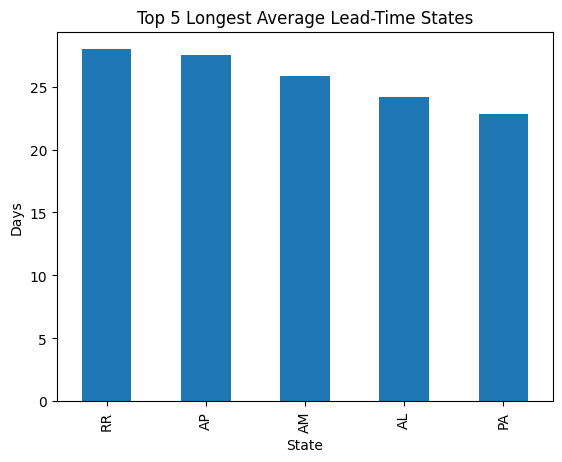

In [49]:
top_5_lead_time.plot(
    kind="bar",
    title="Top 5 Longest Average Lead-Time States",
    xlabel="State",
    ylabel="Days"
)

Based on the plot above, it can be seen that the longest lead-time were around 22 to 26 days, with the longest average lead-time being in the RR state and the lowest in PA state.

<Axes: title={'center': 'Top 5 Shortest Average Lead-Time States'}, xlabel='State', ylabel='Days'>

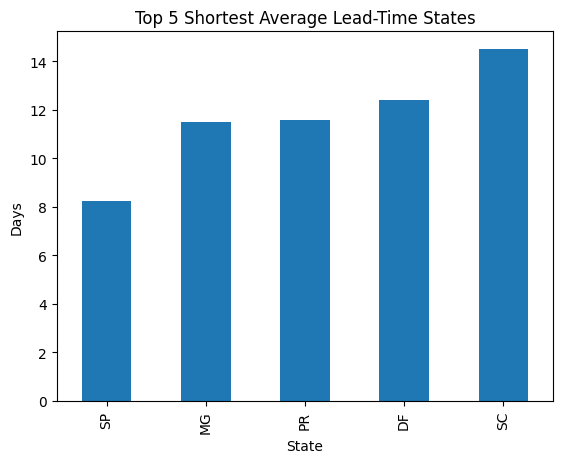

In [48]:
bottom_5_lead_time.plot(
    kind="bar",
    title="Top 5 Shortest Average Lead-Time States",
    xlabel="State",
    ylabel="Days"
)

Based on this plot, the shortest average lead time ranges between 8 to 14 days, with the shortest in the SP state and the longeset in the SC state.

### 4.1.4. Analysis
Based on the values acquired above, it can be observed that the average longest lead-time was at 25 days in the RR state while the shortest was at just 8 days in the SP state. However, reiterating my previous point, longer or shorter time does not necessarily mean worse or better as it still depends on multiple other factors, such as manufacturing process, product quality, and delivery methods. With the result of the analysis, given a more detailed dataset, we would have been able to break these down even more to other areas, such as manufacturing time, loading time, or transportation modes.